In [12]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from typing import List
import time

Regular python                 : 0.00653
JIT compiled: first run        : 0.30031
JIT compiled: other runs       : 0.00010


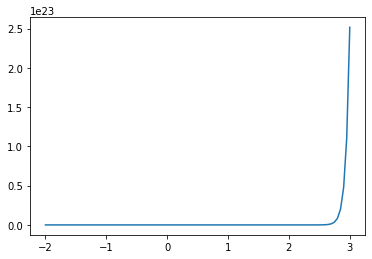

In [26]:
def polynomial(x, coeffs):
  y = jnp.zeros_like(x)
  for k, c in enumerate(coeffs):
    y += c * x ** k
  return y


polymial_compiled = jax.jit(polynomial)

coeffs = np.random.normal(size=50)
coeffs2 = np.random.normal(size=50)
x = jnp.linspace(-2, 3, 100)

t0 = time.time()
y = polynomial(x, coeffs)
t1 = time.time()
y = polymial_compiled(x, coeffs)
t2 = time.time()
y = polymial_compiled(x, coeffs2)
t3 = time.time()

print(f"Regular python                 : {t1-t0:.5f}")
print(f"JIT compiled: first run        : {t2-t1:.5f}")
print(f"JIT compiled: other runs       : {t3-t2:.5f}")

plt.plot(x,y)


In [41]:
coeffs = np.random.normal(size=[50, 100])
print(coeffs.shape)

coeffs = np.random.normal(size=[100, 50]) # 100 polynomials, each of degree 50
x = jnp.linspace(-2, 3, 500)

polynomial_vectorized = jax.jit(jax.vmap(polynomial, in_axes=(None, 0), out_axes=0))
y = polynomial_vectorized(x, coeffs)
print(x.shape)
print("coeffs.shape", coeffs.shape)
print("output shape", y.shape)


(50, 100)
(500,)
coeffs.shape (100, 50)
output shape (100, 500)


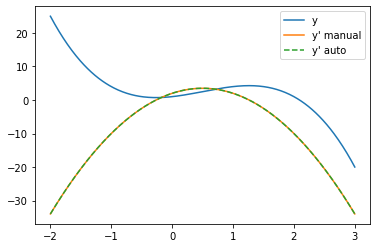

In [48]:
def poly_deriv(x, coeffs):
  y = jnp.zeros_like(x)
  for k, c in enumerate(coeffs):
    if k == 0:
      pass
    else:
      y += c * x ** (k-1) * k
  return y

poly_deriv_auto = jax.vmap(jax.grad(polynomial, argnums=0), in_axes=(0, None))

coeffs = [1,2,3, -2]
x = jnp.linspace(-2, 3, 500)
y = polynomial(x, coeffs)
y_deriv_manual = poly_deriv(x, coeffs)
y_deriv_auto = poly_deriv_auto(x, coeffs)

plt.plot(x, y, label="y")
plt.plot(x, y_deriv_manual, label="y' manual")
plt.plot(x, y_deriv_auto, label="y' auto", ls='--')
plt.legend()

